In [50]:
#Import dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Import data
csv_data = pd.read_csv("Resources/movie_metadata.csv", encoding="utf-8")
df_data = pd.DataFrame(csv_data)
df_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [51]:
#Clean dataset
df_clean = df_data.dropna().reset_index(drop=True)

df = df_clean
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


# Exploratory Analysis

## Analysis of Movie Directors and their IMDB Scores

In [52]:
#Create a dataframe of directors and imdb score for each movie
df_directors_imdb = pd.DataFrame(df[['director_name', 'imdb_score']])
df_directors_imdb

,director_name,imdb_score
0,James Cameron,7.9
1,Gore Verbinski,7.1
2,Sam Mendes,6.8
3,Christopher Nolan,8.5
4,Andrew Stanton,6.6
...,...,...
3751,Olivier Assayas,6.9
3752,Jafar Panahi,7.5
3753,Shane Carruth,7.0
3754,Robert Rodriguez,6.9


In [53]:
#We will analyze imdb scores of above average score vs. below average score
df_directors_imdb['imdb_score'].describe()

count    3756.000000
mean        6.465282
std         1.056247
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

The average IMDB Score is 6.47.

In [54]:
#Group dataset by directors to find their average IMDB Score
df_directors_avg_score = df_directors_imdb.groupby(['director_name']).mean()

In [55]:
df_directors_avg_score

,imdb_score
director_name,
Aaron Schneider,7.100
Aaron Seltzer,2.700
Abel Ferrara,6.600
Adam Goldberg,5.400
Adam Marcus,4.300
...,...
Zack Snyder,7.175
Zak Penn,6.600
Zal Batmanglij,6.900


In [56]:
df_directors_avg_score.describe()

,imdb_score
count,1659.000000
mean,6.310529
std,1.017780
min,2.100000
25%,5.748333
50%,6.450000
75%,7.000000
max,8.700000


In [57]:
#Group data by directors to find the count of Movies made
df_directors_movie_count = df_directors_imdb.groupby(['director_name']).count()

In [58]:
df_directors_movie_count

,imdb_score
director_name,
Aaron Schneider,1
Aaron Seltzer,1
Abel Ferrara,1
Adam Goldberg,1
Adam Marcus,1
...,...
Zack Snyder,8
Zak Penn,1
Zal Batmanglij,1


In [59]:
df_directors_movie_count.describe()

,imdb_score
count,1659.000000
mean,2.264014
std,2.300202
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,25.000000


In [60]:
#Prep data from both dataframes to be graphed in scatter plot

#Convert avg imdb score dataframe column into a list
y = df_directors_avg_score['imdb_score'].tolist()

#Convert count imdb score dataframe column into a list
x = df_directors_movie_count['imdb_score'].tolist()

## Does practice make perfect? 

### As the quantity of movies made per director increases, does the director's average IMDB score increase as well?

<IPython.core.display.Javascript object>


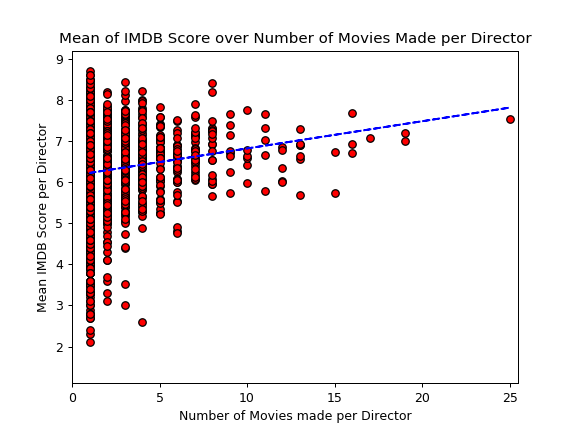

y=0.066259x+(6.160517)


In [77]:
#Create a matplotlib scatter plot based on the directors data above

#Set upper and lower limits
plt.xlim(min(x)-1,max(x)+ 0.5)
plt.ylim(min(y)-1, max(y)+0.5)

#Set title and chart labels
plt.title("Mean of IMDB Score over Number of Movies Made per Director")
plt.xlabel("Number of Movies made per Director")
plt.ylabel("Mean IMDB Score per Director")

#Scatter plot data
plt.scatter(x, y, marker='o', facecolors='red', edgecolors='black')

#Trendline
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x, p(x), "b--")

#Trendline equation
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#Save Scatter Plot
plt.savefig("Images/Mean IMDB over Number of Movies per Director")

The scatter plot above shows a weak positive correlation between the quantity of movies made and the average IMDB score per Director